In [1]:
import os
import cv2
import gradio as gr
import numpy as np
from art import tprint
from PIL import Image 
import matplotlib.pyplot as plt

###### **Жуки**

In [2]:
path = "storage/files/Yolo dataset/bug/"

###### <u>Создание обучающей выборки</u>

10: Центр [180.0, 39.0], Диаметр: 20.0
10: Центр [210.0, 100.0], Диаметр: 20.0


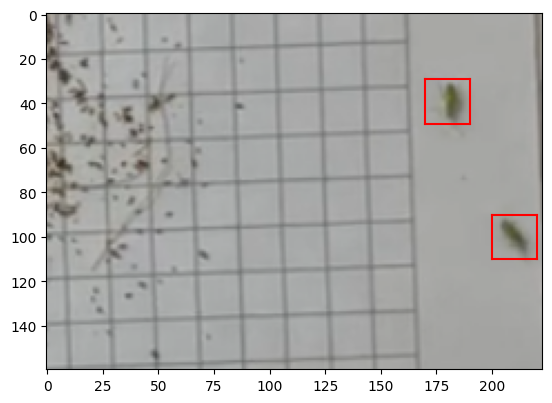

In [121]:
extrapath = ["train", "val"][0]
ii = 9
for i in range(ii, ii + 1):
    im = Image.open(f"{path}{extrapath}/images/{i+1}.png")
    width, height = im.size
    xx, yy = [], []
    with open(f"{path}{extrapath}/labels/{extrapath[0]}_{i+1}.txt", 'r') as f:
        with open(f"{path}/{extrapath}/labels/{i+1}.txt", 'w') as ff:
            for line in f:
                xywh = line.strip().split()
                xx.append([float(xywh[1]) - float(xywh[3])/2, float(xywh[1]) + float(xywh[3])/2])
                yy.append([float(xywh[2]) - float(xywh[4])/2, float(xywh[2]) + float(xywh[4])/2])
                print(f"{i+1}: Центр [{float(xywh[1])}, {float(xywh[2])}], Диаметр: {float(xywh[3])}")
                ff.write(f"{xywh[0]} {float(xywh[1])/width} {float(xywh[2])/height} {float(xywh[3])/width} {float(xywh[4])/height}\n")
    plt.imshow(im)
    for j in range(len(xx)):
        for ii in [[0,0,0,1],[0,1,0,0],[0,1,1,1],[1,1,0,1]]:
            plt.plot([xx[j][ii[0]], xx[j][ii[1]]], [yy[j][ii[2]], yy[j][ii[3]]], c='r')
    plt.show()

###### <u>Обучение</u>

In [3]:
from ultralytics import YOLO
import cv2
import numpy as np

# Загрузка модели YOLOv8
model = YOLO('myYOLObug.pt')

# Список цветов для различных классов
colors = [
    (255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (0, 255, 255),
    (255, 0, 255), (192, 192, 192), (128, 128, 128), (128, 0, 0), (128, 128, 0),
    (0, 128, 0), (128, 0, 128), (0, 128, 128), (0, 0, 128), (72, 61, 139),
    (47, 79, 79), (47, 79, 47), (0, 206, 209), (148, 0, 211), (255, 20, 147)
]

In [6]:
model.train(data=path + "fortrain.yaml", epochs=200)

New https://pypi.org/project/ultralytics/8.3.62 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.97 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (AMD Ryzen 3 5300U with Radeon Graphics)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=storage/files/Yolo dataset/bug/fortrain.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=train62, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=

train: Scanning /home/kodiak/Desktop/OpenCompendium/PythonCompendium/storage/fil

train: New cache created: /home/kodiak/Desktop/OpenCompendium/PythonCompendium/storage/files/Yolo dataset/bug/train/labels.cache



val: Scanning /home/kodiak/Desktop/OpenCompendium/PythonCompendium/storage/files

val: New cache created: /home/kodiak/Desktop/OpenCompendium/PythonCompendium/storage/files/Yolo dataset/bug/val/labels.cache
Plotting labels to runs/detect/train62/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train62
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200         0G       2.52      2.175      1.596         36        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7    0.00444      0.571    0.00444   0.000875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200         0G      2.184      1.636      1.446         46        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7    0.00333      0.429    0.00326     0.0013



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200         0G      2.291      2.216      1.581         34        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7    0.00444      0.571    0.00451    0.00141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200         0G      2.512      2.177      1.431         61        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7    0.00444      0.571    0.00482    0.00155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200         0G      2.369      1.956      1.462         54        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7    0.00444      0.571    0.00402     0.0015



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200         0G      2.767      1.719      1.423         63        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7    0.00444      0.571    0.00369    0.00118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200         0G      2.146      1.665      1.595         38        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7    0.00444      0.571    0.00384    0.00134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200         0G      2.474      2.158      2.062         24        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7    0.00444      0.571     0.0039    0.00123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200         0G      2.107      1.618      1.386         49        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7    0.00444      0.571    0.00417    0.00141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200         0G      2.105      1.495      1.452         33        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7    0.00444      0.571    0.00435    0.00138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200         0G      1.883       1.44      1.385         39        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7    0.00444      0.571    0.00435    0.00138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200         0G      1.933      1.385      1.329         32        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7    0.00444      0.571    0.00486    0.00144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200         0G       1.94      1.414      1.342         32        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7    0.00444      0.571    0.00528    0.00154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200         0G      1.937      1.235      1.259         55        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7    0.00444      0.571     0.0054     0.0015



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200         0G      1.949      1.323      1.415         41        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7    0.00444      0.571     0.0056    0.00182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200         0G       2.04      2.049      1.541         16        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7    0.00444      0.571     0.0058    0.00188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200         0G      1.989      1.422      1.413         24        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7    0.00444      0.571    0.00591    0.00214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200         0G      1.888      1.128      1.228         55        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7    0.00444      0.571    0.00591    0.00214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200         0G      1.891      1.143      1.236         34        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7    0.00444      0.571    0.00853    0.00314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200         0G      1.786      1.423      1.261         32        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7    0.00444      0.571    0.00853    0.00314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200         0G      2.127      1.194      1.193         48        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7    0.00444      0.571     0.0207    0.00758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200         0G      1.766      1.428      1.248         26        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7    0.00444      0.571     0.0207    0.00758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200         0G       2.09      1.488      1.227         37        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7    0.00444      0.571      0.357       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200         0G      1.641     0.9967       1.07         48        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7    0.00444      0.571      0.357       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200         0G      1.775      1.115      1.174         35        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7    0.00444      0.571      0.432      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200         0G      2.085      1.261      1.084         54        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7    0.00444      0.571      0.432      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200         0G      2.066      1.353      1.188         42        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7    0.00993      0.571      0.476      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200         0G      1.694      1.079      1.165         37        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7    0.00993      0.571      0.476      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200         0G      1.787      1.337      1.243         29        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7       0.64      0.514      0.526      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200         0G      1.904      1.141      1.079         57        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7       0.64      0.514      0.526      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200         0G       1.85      1.067      1.238         33        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.662      0.429      0.491      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200         0G      1.943      1.174      1.159         43        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.662      0.429      0.491      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200         0G      1.894      1.159     0.9938         65        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.699      0.429      0.477      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200         0G      1.742      1.231     0.9665         46        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.699      0.429      0.477      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200         0G       1.66       1.15      1.052         68        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7        0.7      0.429       0.48      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200         0G      1.847      1.105      1.081         50        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7        0.7      0.429       0.48      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200         0G      1.784      1.069      1.212         37        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.777      0.507      0.667      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200         0G      1.753      1.094      1.033         54        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.777      0.507      0.667      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200         0G      1.541     0.9559      1.051         56        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.789      0.541      0.667      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200         0G      1.801       1.06      1.141         49        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.789      0.541      0.667      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200         0G      1.711      0.987      1.034         55        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.814      0.633      0.674      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200         0G      1.624      1.173      1.179         36        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.814      0.633      0.674      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200         0G      1.657      1.101      1.072         43        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.832       0.71      0.762      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200         0G       1.57      1.051      1.039         46        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.832       0.71      0.762      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200         0G      1.508     0.9469      1.042         35        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.714      0.714      0.837      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200         0G      1.501     0.9457      1.066         54        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.714      0.714      0.837      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200         0G      1.536     0.9913       1.06         51        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.726       0.76      0.872      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200         0G      1.548     0.9572      1.062         51        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.726       0.76      0.872      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200         0G      1.539     0.9953      1.063         42        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7       0.74      0.857      0.895      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200         0G      1.443     0.9185       1.12         33        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7       0.74      0.857      0.895      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200         0G      1.544      1.013      1.095         35        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.763      0.924      0.924      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200         0G       1.61     0.9501      1.015         57        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.763      0.924      0.924      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200         0G      1.437     0.9792      1.034         38        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.763      0.924      0.924      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200         0G      1.685      1.017      1.043         54        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.867      0.933       0.96       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200         0G      1.685      1.042      1.029         47        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.867      0.933       0.96       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200         0G      1.527     0.9159      1.043         53        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.867      0.933       0.96       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200         0G      1.637     0.9485       1.12         46        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.867      0.938       0.96      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200         0G       1.53      1.035      1.042         43        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.867      0.938       0.96      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200         0G      1.586      0.918     0.9989         61        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.867      0.938       0.96      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200         0G      1.454     0.9202     0.9762         70        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.958      0.857      0.978       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200         0G      1.443      1.021      1.061         39        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.958      0.857      0.978       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200         0G      1.679     0.9455       1.03         50        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.958      0.857      0.978       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200         0G      1.556     0.9776      1.065         33        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.933      0.857      0.978      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200         0G      1.398     0.9074      1.039         42        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.933      0.857      0.978      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200         0G      1.649      1.137      1.191         37        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.933      0.857      0.978      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200         0G      1.768      1.012      1.052         48        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.953          1      0.995      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200         0G      1.417     0.8283     0.9723         51        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.953          1      0.995      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200         0G      1.426     0.9275     0.9641         57        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.953          1      0.995      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200         0G      1.561     0.9823      1.095         44        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.976          1      0.995      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200         0G      1.467     0.8788     0.9518         66        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.976          1      0.995      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200         0G      1.402     0.9904     0.9182         37        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.976          1      0.995      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200         0G      1.588      0.909      1.072         55        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.988          1      0.995      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200         0G      1.469     0.9121     0.9406         49        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.988          1      0.995      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200         0G      1.395     0.8598     0.9378         56        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.988          1      0.995      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200         0G      1.471     0.9765      1.051         40        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.991          1      0.995      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200         0G      1.427     0.9887     0.9811         39        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.991          1      0.995      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200         0G      1.562      1.029      1.085         35        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.991          1      0.995      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200         0G      1.548     0.9159      1.073         27        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7          1      0.976      0.995      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200         0G      1.396     0.8863     0.9856         46        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7          1      0.976      0.995      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200         0G      1.334     0.8163      1.006         42        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7          1      0.976      0.995      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200         0G      1.528     0.9101      1.108         34        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7          1      0.984      0.995        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200         0G       1.29     0.9029      0.988         36        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7          1      0.984      0.995        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200         0G      1.543     0.8903      1.029         63        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7          1      0.984      0.995        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200         0G      1.419     0.8942      1.155         29        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7          1      0.983      0.995      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200         0G       1.55      1.045      1.061         21        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7          1      0.983      0.995      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200         0G      1.302     0.8118      1.005         39        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7          1      0.983      0.995      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200         0G      1.316     0.9042     0.9369         34        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7          1      0.983      0.995      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200         0G      1.224     0.8669     0.9523         44        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7          1      0.994      0.995      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200         0G      1.082     0.8342     0.9611         33        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7          1      0.994      0.995      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200         0G      1.478      0.853     0.9794         56        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7          1      0.994      0.995      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200         0G      1.403     0.9336     0.9656         49        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7          1      0.994      0.995      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200         0G      1.154     0.8674       1.02         29        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7          1      0.989      0.995      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200         0G      1.536      0.962     0.9377         77        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7          1      0.989      0.995      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200         0G      1.478     0.9501      1.014         44        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7          1      0.989      0.995      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200         0G      1.497      0.943     0.9233         56        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7          1      0.989      0.995      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200         0G      1.347     0.8407     0.9463         67        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7          1      0.989      0.995      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200         0G      1.486      1.095      1.153         28        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7          1      0.989      0.995      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200         0G      1.459       1.04      1.017         36        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7          1      0.989      0.995      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200         0G      1.406     0.8512     0.9897         52        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7          1      0.989      0.995      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200         0G      1.431     0.8694      1.002         47        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7          1      0.996      0.995      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200         0G      1.548     0.9123      1.071         34        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7          1      0.996      0.995      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200         0G      1.529      1.025      1.067         29        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7          1      0.996      0.995      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200         0G      1.534     0.8712      1.107         30        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7          1      0.996      0.995      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200         0G      1.423     0.8984       1.01         37        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.998          1      0.995      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200         0G      1.474      0.882      1.089         44        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.998          1      0.995      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200         0G       1.22     0.8359      1.044         25        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.998          1      0.995      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200         0G      1.315     0.8565     0.9898         37        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.998          1      0.995      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200         0G      1.238     0.7672     0.9974         46        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.991          1      0.995      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200         0G      1.309      0.762     0.9607         73        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.991          1      0.995      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200         0G      1.284     0.7922     0.9674         42        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.991          1      0.995      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200         0G      1.246     0.8088      1.007         37        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.991          1      0.995      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200         0G      1.482     0.9351      1.129         27        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.988          1      0.995      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200         0G      1.259     0.8563     0.9677         39        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.988          1      0.995      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200         0G      1.502     0.7893      0.974         52        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.988          1      0.995      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200         0G      1.227     0.8198     0.9551         29        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.988          1      0.995      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200         0G      1.331     0.8242      1.008         42        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.985          1      0.995      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200         0G      1.184     0.7901      1.083         31        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.985          1      0.995      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200         0G      1.161     0.7763     0.9748         33        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.985          1      0.995      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200         0G      1.129     0.8587     0.9747         26        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.985          1      0.995      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200         0G       1.42     0.7868     0.9856         57        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.984          1      0.995      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200         0G      1.123     0.7569     0.9216         47        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.984          1      0.995      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200         0G      1.209     0.7975     0.9196         45        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.984          1      0.995      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200         0G      1.194     0.8073     0.9234         35        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.984          1      0.995      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200         0G      1.243      0.876     0.9996         32        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.983          1      0.995      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200         0G       1.49     0.9345      1.059         29        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.983          1      0.995      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200         0G     0.9538     0.7605     0.9096         25        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.983          1      0.995      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200         0G      1.224     0.7593      1.008         29        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.983          1      0.995      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200         0G      1.283     0.7686      0.955         48        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.982          1      0.995       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200         0G      1.226     0.7395     0.9528         64        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.982          1      0.995       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200         0G      1.409     0.8593      1.003         47        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.982          1      0.995       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200         0G      1.222     0.7673     0.9539         62        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.982          1      0.995       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200         0G      1.067     0.7136     0.8638         39        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.982          1      0.995      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200         0G      1.149     0.7789     0.9475         32        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.982          1      0.995      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200         0G      1.184     0.7895      0.977         48        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.982          1      0.995      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200         0G      1.131     0.7487     0.9294         32        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.982          1      0.995      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200         0G      1.268     0.7823      1.027         47        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.979          1      0.995      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200         0G      1.057     0.7636     0.9585         26        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.979          1      0.995      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200         0G      1.355     0.8225      0.916         73        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.979          1      0.995      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200         0G       1.14     0.8181     0.9072         47        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.979          1      0.995      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200         0G      1.207     0.7835     0.9983         36        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7       0.98          1      0.995      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200         0G      1.313     0.7887     0.9293         62        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7       0.98          1      0.995      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200         0G      1.181       0.79     0.9355         36        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7       0.98          1      0.995      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200         0G      1.131     0.7999     0.9105         73        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7       0.98          1      0.995      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200         0G      1.306     0.7724     0.8622         63        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.982          1      0.995      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200         0G      1.074     0.7845      1.008         29        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.982          1      0.995      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200         0G      1.031     0.7333     0.9961         31        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.982          1      0.995      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200         0G      1.139     0.7443     0.9029         38        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.982          1      0.995      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200         0G     0.9915     0.7428      0.961         30        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.984          1      0.995       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200         0G      1.106      0.729     0.9442         46        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.984          1      0.995       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200         0G      1.112     0.6838     0.9231         38        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.984          1      0.995       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200         0G      1.128     0.6849     0.9152         48        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.984          1      0.995       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200         0G      1.343     0.8394     0.9367         43        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.983          1      0.995      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200         0G      1.135     0.7523     0.9068         55        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.983          1      0.995      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200         0G      1.134     0.9397      1.029         22        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.983          1      0.995      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200         0G      1.294     0.7514       1.02         42        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.983          1      0.995      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200         0G      1.066     0.6772     0.9809         29        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.984          1      0.995      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200         0G      1.151     0.6909     0.9389         75        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.984          1      0.995      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200         0G      1.074     0.7638     0.9689         32        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.984          1      0.995      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200         0G      1.034     0.7329     0.9236         32        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.984          1      0.995      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200         0G      1.026     0.7559      0.906         31        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.987          1      0.995      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200         0G      1.211     0.7654     0.9204         35        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.987          1      0.995      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200         0G      1.084     0.6922     0.9617         42        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.987          1      0.995      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200         0G      1.223     0.7447     0.9004         55        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.987          1      0.995      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200         0G      1.135     0.7451     0.9121         44        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7       0.99          1      0.995      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200         0G      1.199     0.7105     0.9462         61        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7       0.99          1      0.995      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200         0G     0.9975     0.8193     0.9349         23        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7       0.99          1      0.995      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200         0G      1.042     0.6729     0.8844         39        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7       0.99          1      0.995      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200         0G      1.084     0.7433     0.9611         28        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.991          1      0.995      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200         0G      1.059     0.7149     0.8941         45        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.991          1      0.995      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200         0G      1.163     0.7308      1.068         28        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.991          1      0.995      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200         0G      1.143     0.7379     0.8622         49        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.991          1      0.995      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200         0G      1.008     0.6556     0.9204         48        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7       0.99          1      0.995      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200         0G      1.199     0.7593     0.9903         33        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7       0.99          1      0.995      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200         0G      1.119     0.6675     0.8883         67        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7       0.99          1      0.995      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200         0G      1.168     0.7828      1.048         33        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7       0.99          1      0.995      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200         0G      1.181     0.7022     0.9762         38        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.989          1      0.995      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200         0G       1.05     0.6822     0.9118         56        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.989          1      0.995      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200         0G      1.283     0.7973     0.9193         36        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.989          1      0.995      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200         0G      1.124     0.6914     0.9164         38        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.989          1      0.995      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200         0G     0.9253     0.6848     0.8891         21        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.988          1      0.995      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200         0G     0.9975     0.6329     0.8971         60        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.988          1      0.995      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200         0G      1.281     0.7397     0.9364         43        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.988          1      0.995      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200         0G      1.137     0.7519     0.9238         25        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.988          1      0.995      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200         0G      1.129     0.6834     0.9601         43        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.986          1      0.995      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200         0G      1.167     0.7194     0.8919         80        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.986          1      0.995      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200         0G      1.178     0.7925      0.871         50        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.986          1      0.995      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200         0G      1.078     0.6968     0.8759         44        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.986          1      0.995      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200         0G      1.102     0.6587     0.9439         52        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.986          1      0.995      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200         0G     0.9763     0.7621     0.9515         20        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.986          1      0.995      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200         0G      1.017     0.7285     0.9323         45        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.986          1      0.995      0.469


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200         0G     0.9805     0.6239     0.9042         27        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.986          1      0.995      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200         0G     0.9808     0.6747     0.9577         26        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.985          1      0.995      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200         0G      1.065     0.7321     0.9459         27        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.985          1      0.995      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200         0G      1.121     0.7459     0.9838         25        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.985          1      0.995      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200         0G      1.442      1.117      1.012         27        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.985          1      0.995      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200         0G      1.254     0.8239     0.8941         26        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.984          1      0.995      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200         0G      1.105     0.7022     0.9007         26        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.984          1      0.995      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200         0G      1.128     0.7888      1.017         25        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.984          1      0.995      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200         0G      1.015     0.6911     0.9539         26        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.984          1      0.995      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200         0G     0.9909     0.6691     0.9391         27        640: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          3          7      0.984          1      0.995      0.439



200 epochs completed in 0.222 hours.
Optimizer stripped from runs/detect/train62/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train62/weights/best.pt, 6.3MB

Validating runs/detect/train62/weights/best.pt...
Ultralytics YOLOv8.2.97 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (AMD Ryzen 3 5300U with Radeon Graphics)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  m


                   all          3          7          1      0.996      0.995      0.558
Speed: 9.8ms preprocess, 137.2ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train62


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f811bcfb4c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [8]:
# model.save('myYOLObug.pt')

###### <u>Применение фреймворка</u>

In [9]:
# Открытие исходного видеофайла
N_exp = 2
filename = f'{N_exp}.mp4'
capture = cv2.VideoCapture(path + 'fulls/' + filename)

# Чтение параметров видео
fps = int(capture.get(cv2.CAP_PROP_FPS))
width = int(capture.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Настройка выходного файла
output_video_path = path + 'res/' + filename
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
writer = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

count = 0 
boxes_in_frames = []
f = open(path + 'res/' + f"boxes_{N_exp}.txt", 'w')
while True:
    # Захват кадра
    ret, frame = capture.read()
    count += 1
    print(f"Кадр {count}")
    if not ret: # or count > 20:
        break

    # Обработка кадра с помощью модели YOLO
    results = model(frame)[0]

    # Получение данных об объектах
    boxes_in_frame = []
    classes_names = results.names
    classes = results.boxes.cls.cpu().numpy()
    boxes = results.boxes.xyxy.cpu().numpy().astype(np.int32)
    # Рисование рамок и подписей на кадре
    for class_id, box, conf in zip(classes, boxes, results.boxes.conf):
        if conf > 0.5:
            class_name = classes_names[int(class_id)]
            color = colors[int(class_id) % len(colors)]
            x1, y1, x2, y2 = box
            boxes_in_frame += [box]
            cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
            cv2.putText(frame, class_name, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    boxes_in_frames += [boxes_in_frame]

    # Запись положения найденного тела
    n = len(boxes_in_frame)
    txt = f"{n} "
    for i in range(n):
        for j in range(4):
            txt += f"{boxes_in_frame[i][j]} "
    f.write(txt + "\n")

    # Запись обработанного кадра в выходной файл
    writer.write(frame)

# Освобождение ресурсов и закрытие окон
capture.release()
writer.release()
f.close()

Кадр 1

0: 640x352 2 bugs, 75.4ms
Speed: 3.3ms preprocess, 75.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 352)
Кадр 2

0: 640x352 2 bugs, 92.5ms
Speed: 2.6ms preprocess, 92.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 352)
Кадр 3

0: 640x352 2 bugs, 123.3ms
Speed: 6.0ms preprocess, 123.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 352)
Кадр 4

0: 640x352 2 bugs, 72.6ms
Speed: 3.6ms preprocess, 72.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 352)
Кадр 5

0: 640x352 2 bugs, 68.1ms
Speed: 4.5ms preprocess, 68.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 352)
Кадр 6

0: 640x352 2 bugs, 83.1ms
Speed: 6.1ms preprocess, 83.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 352)
Кадр 7

0: 640x352 1 bug, 72.8ms
Speed: 19.5ms preprocess, 72.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 352)
Кадр 8

0: 640x352 2 bugs, 65.8ms
Speed: 2.6ms preprocess, 65.8ms inference, 0.7m